In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [3]:
exp_tag = 'fe2_d2_rt20p'

In [4]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks_{exp_tag}.pickle')

In [5]:
spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks_{exp_tag}.pickle')

In [6]:
spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks_{exp_tag}.pickle')

In [7]:
usdm_summ, usdm_summ_grp = dnw.compute_track_summary_characterization(usdm_dtd, 7)

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/../../ndrought/wrangle_v11.py:971: FutureWarning: ['xy_size', 'uv_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return summary_df, summary_df.groupby(pd.cut(summary_df.lifetime, bins=bins)).agg(['mean', 'median', 'max', 'min', 'std', 'count'])


In [8]:
spi30d_summ, spi30d_summ_grp = dnw.compute_track_summary_characterization(spi30d_dtd, 5)

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/../../ndrought/wrangle_v11.py:971: FutureWarning: ['xy_size', 'uv_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return summary_df, summary_df.groupby(pd.cut(summary_df.lifetime, bins=bins)).agg(['mean', 'median', 'max', 'min', 'std', 'count'])


In [9]:
spi180d_summ, spi180d_summ_grp = dnw.compute_track_summary_characterization(spi180d_dtd, 5)

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/../../ndrought/wrangle_v11.py:971: FutureWarning: ['xy_size', 'uv_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return summary_df, summary_df.groupby(pd.cut(summary_df.lifetime, bins=bins)).agg(['mean', 'median', 'max', 'min', 'std', 'count'])


In [10]:
usdm_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",18.0,14.0,28,7,10.0,15
"(30, 60]",42.0,42.0,49,35,6.0,8
"(60, 90]",75.0,80.0,84,63,10.0,8
"(90, 180]",118.0,105.0,161,91,26.0,11
"(180, 365]",300.0,308.0,350,203,45.0,11
"(365, 730]",611.0,623.0,728,420,83.0,23
"(730, 1825]",1307.0,1379.0,1792,735,434.0,21
"(1825, 8141]",2037.0,2044.0,2219,1841,192.0,4


In [11]:
spi30d_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",14.0,15.0,30.0,5.0,8.0,1405
"(30, 60]",42.0,40.0,60.0,35.0,7.0,98
"(60, 90]",72.0,70.0,90.0,65.0,8.0,22
"(90, 180]",95.0,95.0,95.0,95.0,NaN,1
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [12]:
spi180d_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",14.0,10.0,30.0,5.0,8.0,521
"(30, 60]",47.0,45.0,60.0,35.0,8.0,170
"(60, 90]",76.0,75.0,90.0,65.0,8.0,106
"(90, 180]",142.0,150.0,180.0,95.0,26.0,177
"(180, 365]",224.0,220.0,320.0,185.0,33.0,104
"(365, 730]",420.0,420.0,425.0,415.0,7.0,2
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [13]:
(usdm_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",40.0,16.0,155.0,0.0,52.0,0.0
"(30, 60]",39.0,13.0,166.0,0.0,56.0,0.0
"(60, 90]",101.0,73.0,260.0,17.0,94.0,0.0
"(90, 180]",323.0,156.0,1050.0,48.0,368.0,0.0
"(180, 365]",1576.0,1303.0,3102.0,87.0,1105.0,0.0
"(365, 730]",2311.0,2211.0,3316.0,1776.0,450.0,0.0
"(730, 1825]",5125.0,5891.0,8624.0,1323.0,2128.0,0.0
"(1825, 8141]",9144.0,9038.0,9946.0,8553.0,694.0,0.0


In [14]:
(spi30d_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",426.0,244.0,3617.0,0.0,516.0,1.0
"(30, 60]",1451.0,1220.0,3691.0,275.0,952.0,0.0
"(60, 90]",2267.0,2310.0,3294.0,731.0,634.0,0.0
"(90, 180]",2402.0,2402.0,2402.0,2402.0,NaN,0.0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
(spi180d_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",120.0,62.0,1044.0,0.0,152.0,1.0
"(30, 60]",525.0,448.0,2521.0,1.0,408.0,0.0
"(60, 90]",1002.0,722.0,3016.0,70.0,760.0,0.0
"(90, 180]",1911.0,1819.0,4268.0,57.0,1084.0,0.0
"(180, 365]",4138.0,3441.0,8921.0,1020.0,2369.0,0.0
"(365, 730]",8950.0,8950.0,8969.0,8930.0,27.0,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [16]:
(usdm_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",28.0,16.0,113.0,0.0,37.0,0.0
"(30, 60]",27.0,13.0,76.0,0.0,29.0,0.0
"(60, 90]",53.0,26.0,172.0,10.0,57.0,0.0
"(90, 180]",205.0,69.0,746.0,12.0,277.0,0.0
"(180, 365]",482.0,485.0,1226.0,24.0,355.0,0.0
"(365, 730]",796.0,779.0,1523.0,179.0,366.0,0.0
"(730, 1825]",967.0,798.0,2068.0,152.0,532.0,0.0
"(1825, 8141]",956.0,940.0,1354.0,591.0,330.0,0.0


In [17]:
(spi30d_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",207.0,122.0,1840.0,0.0,238.0,1.0
"(30, 60]",456.0,366.0,1323.0,27.0,322.0,0.0
"(60, 90]",382.0,332.0,919.0,22.0,257.0,0.0
"(90, 180]",773.0,773.0,773.0,773.0,NaN,0.0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
(spi180d_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",65.0,23.0,811.0,0.0,99.0,1.0
"(30, 60]",180.0,141.0,731.0,0.0,162.0,0.0
"(60, 90]",266.0,220.0,1022.0,9.0,223.0,0.0
"(90, 180]",325.0,278.0,1252.0,4.0,231.0,0.0
"(180, 365]",459.0,401.0,1282.0,55.0,286.0,0.0
"(365, 730]",648.0,648.0,656.0,641.0,11.0,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [19]:
(usdm_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",3.0,1.0,15.0,0.0,4.0,0.0
"(30, 60]",1.0,0.0,4.0,0.0,1.0,0.0
"(60, 90]",1.0,1.0,4.0,0.0,1.0,0.0
"(90, 180]",2.0,2.0,7.0,0.0,2.0,0.0
"(180, 365]",5.0,4.0,11.0,0.0,4.0,0.0
"(365, 730]",4.0,3.0,7.0,3.0,1.0,0.0
"(730, 1825]",4.0,4.0,5.0,2.0,1.0,0.0
"(1825, 8141]",4.0,5.0,5.0,4.0,0.0,0.0


In [20]:
(spi30d_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",30.0,21.0,235.0,0.0,30.0,1.0
"(30, 60]",35.0,29.0,101.0,7.0,24.0,0.0
"(60, 90]",31.0,30.0,46.0,11.0,8.0,0.0
"(90, 180]",25.0,25.0,25.0,25.0,NaN,0.0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
(spi180d_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",9.0,5.0,96.0,0.0,11.0,1.0
"(30, 60]",11.0,9.0,57.0,0.0,9.0,0.0
"(60, 90]",13.0,9.0,34.0,1.0,9.0,0.0
"(90, 180]",13.0,13.0,28.0,0.0,7.0,0.0
"(180, 365]",18.0,15.0,38.0,4.0,9.0,0.0
"(365, 730]",21.0,21.0,22.0,21.0,0.0,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [22]:
usdm_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.879,0.953,1.000,0.464,0.168,15
"(30, 60]",0.943,0.950,1.000,0.894,0.039,8
"(60, 90]",0.898,0.905,0.985,0.756,0.069,8
"(90, 180]",0.907,0.901,0.958,0.877,0.026,11
"(180, 365]",0.914,0.894,0.963,0.862,0.043,11
"(365, 730]",0.943,0.954,0.970,0.887,0.022,23
"(730, 1825]",0.944,0.943,0.967,0.920,0.015,21
"(1825, 8141]",0.943,0.943,0.946,0.940,0.003,4


In [23]:
spi30d_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.524,0.516,1.000,0.108,0.163,1405
"(30, 60]",0.543,0.562,0.769,0.381,0.088,98
"(60, 90]",0.534,0.544,0.630,0.396,0.067,22
"(90, 180]",0.623,0.623,0.623,0.623,NaN,1
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [24]:
spi180d_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.665,0.659,1.000,0.113,0.170,521
"(30, 60]",0.655,0.646,0.992,0.358,0.101,170
"(60, 90]",0.666,0.664,0.880,0.464,0.085,106
"(90, 180]",0.729,0.731,0.894,0.567,0.067,177
"(180, 365]",0.730,0.742,0.843,0.604,0.048,104
"(365, 730]",0.764,0.764,0.764,0.763,0.000,2
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


## Boxplots

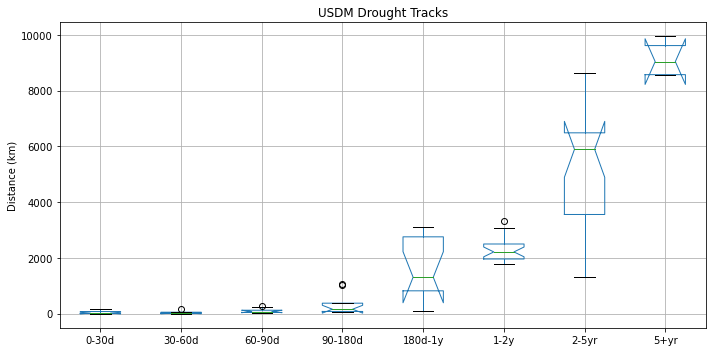

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['distance']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("USDM Drought Tracks")

plt.tight_layout()

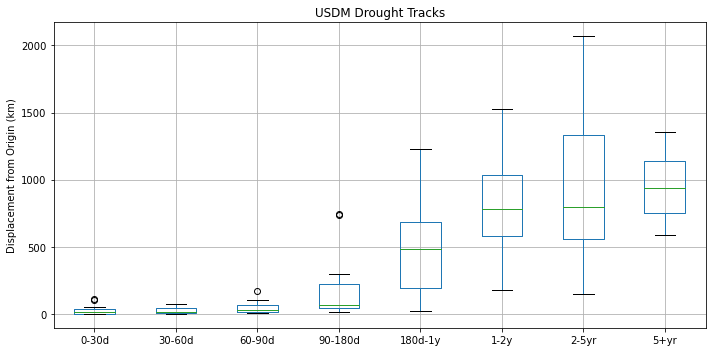

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['displacement']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

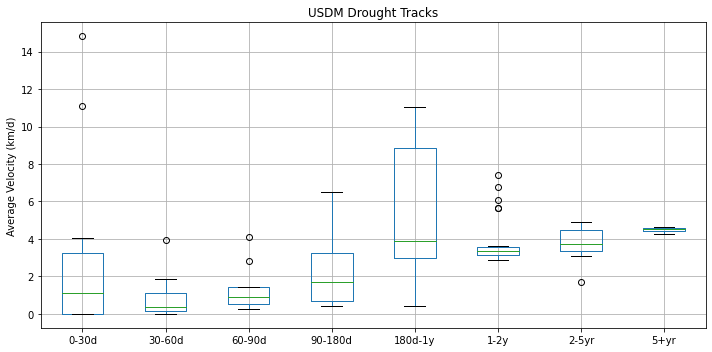

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['average velocity']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

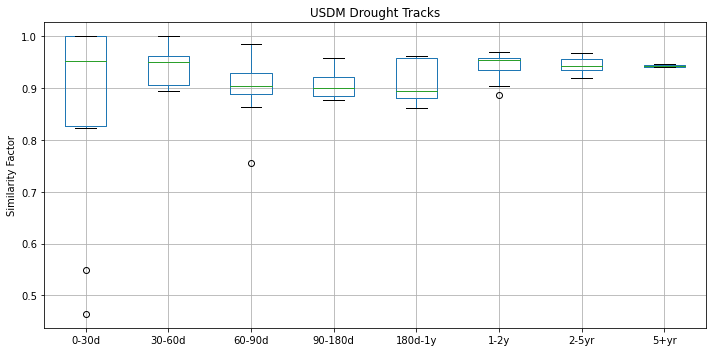

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['similarity']).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

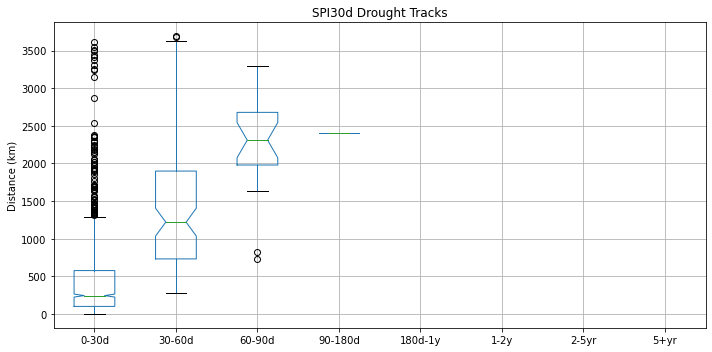

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['distance']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI30d Drought Tracks")

plt.tight_layout()

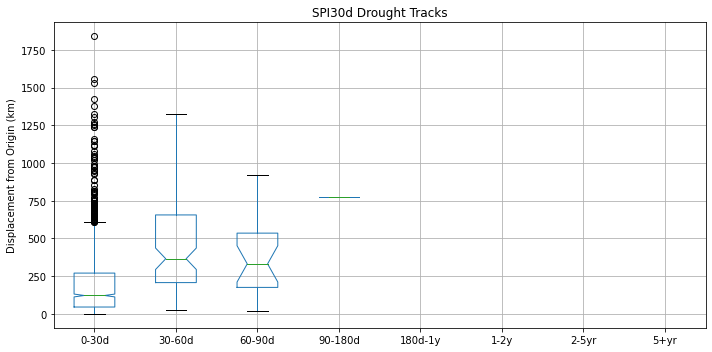

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['displacement']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

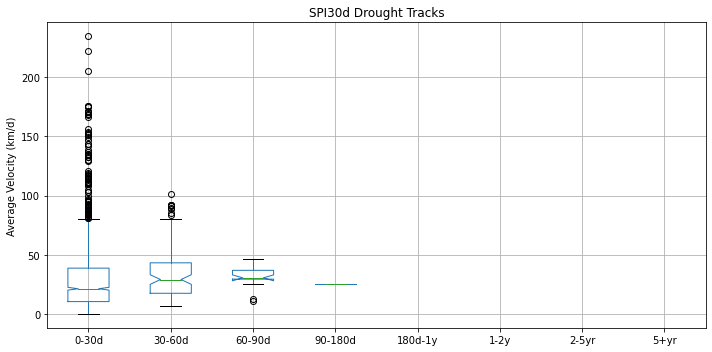

In [31]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['average velocity']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

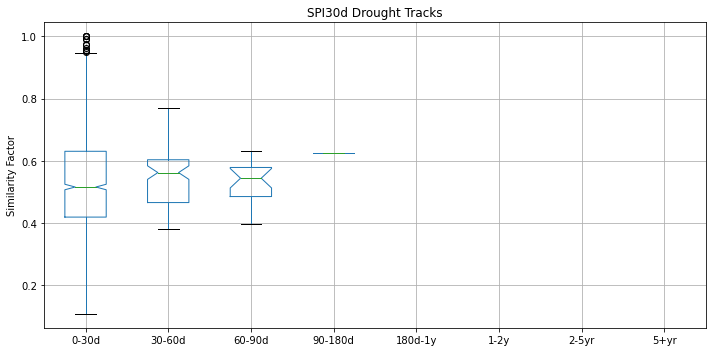

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['similarity']).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

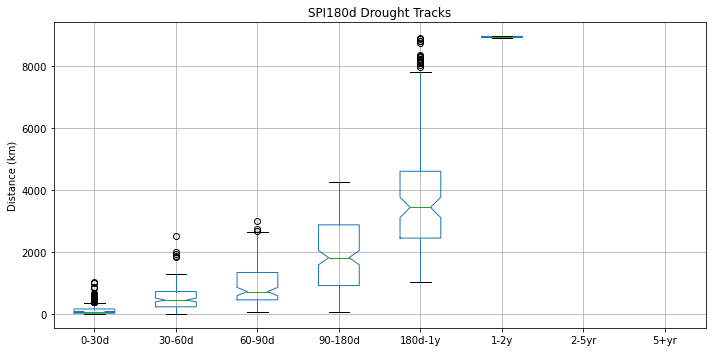

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['distance']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI180d Drought Tracks")

plt.tight_layout()

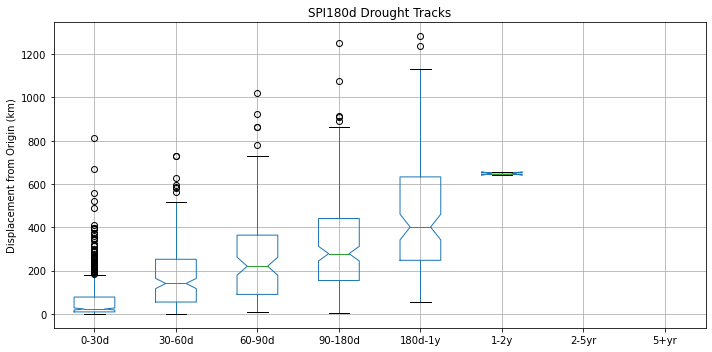

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['displacement']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

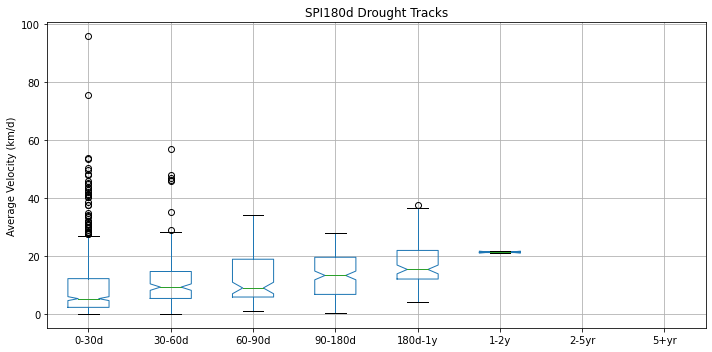

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['average velocity']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

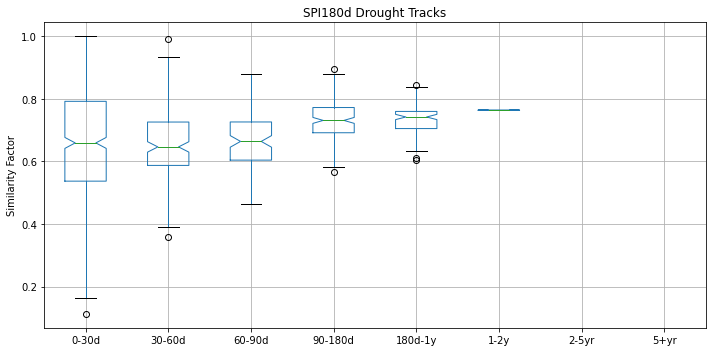

In [36]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['similarity']).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

In [37]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(60.0, 90.0, closed='right'),
 Interval(0.0, 30.0, closed='right'),
 nan,
 Interval(90.0, 180.0, closed='right'),
 Interval(30.0, 60.0, closed='right')]

In [38]:
pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])

,lifetime,distance,displacement,average velocity,similarity,xy_size,uv_size
15,85,611477.785259,226188.985475,7193.856297,0.603931,"[112, 160, 219, 265, 743, 891, 756, 718, 718, ...","[160, 219, 265, 743, 891, 756, 718, 525, 152, ..."
16,80,992724.802446,271894.868605,12409.060031,0.669358,"[125, 133, 132, 148, 187, 187, 162, 112, 375, ...","[133, 132, 148, 187, 187, 162, 112, 375, 3008,..."
18,70,542728.306395,52084.471970,7753.261520,0.582978,"[193, 1130, 925, 795, 664, 504, 863, 2666, 266...","[1130, 925, 795, 664, 504, 863, 2666, 1086, 11..."
20,65,651023.994105,157935.509055,10015.753755,0.553798,"[160, 891, 756, 718, 718, 525, 857, 2666, 2666...","[891, 756, 718, 525, 152, 857, 2666, 1086, 113..."
21,65,928207.005672,248394.500422,14280.107780,0.523729,"[172, 1969, 2757, 2757, 1362, 449, 3134, 9014,...","[1969, 2757, 1362, 715, 449, 3134, 9014, 10200..."
...,...,...,...,...,...,...,...
1276,75,369261.772157,144207.734696,4923.490295,0.671620,"[147, 144, 519, 1064, 841, 817, 862, 760, 954,...","[144, 519, 1064, 841, 817, 862, 760, 954, 1346..."
1277,70,558579.710741,117219.115376,7979.710153,0.592788,"[133, 339, 523, 316, 323, 808, 808, 397, 216, ...","[339, 523, 316, 323, 808, 397, 216, 226, 568, ..."
1307,90,652010.985244,376555.205923,7244.566503,0.852335,"[147, 168, 8578, 8749, 7397, 7059, 7284, 5045,...","[168, 8578, 8749, 7397, 7059, 7284, 5045, 4374..."
1313,70,233795.098953,140628.545837,3339.929985,0.703618,"[128, 181, 180, 181, 815, 1184, 1674, 1600, 13...","[181, 180, 181, 815, 1184, 1674, 1600, 1366, 4..."


Okay, neat. So if I want to make a summarizing plot, then I can technically do that. Gonna be annoying, but it's possible. Or if I just want to get more info based on the groupings

## Origin / Termination

In [39]:
def get_origins(x_track, y_track):
    x_origins = [x[0] for x in x_track]
    y_origins = [y[0] for y in y_track]
    
    return x_origins, y_origins

def get_terminations(x_track, y_track, u_track, v_track):
    x_termination = [x[-1]+u[-1] for x, u in zip(x_track, u_track)]
    y_termination = [y[-1]+v[-1] for y, v in zip(y_track, v_track)]

    return x_termination, y_termination

In [40]:
usdm_x_origins, usdm_y_origins = get_origins(usdm_dtd['x'], usdm_dtd['y'])

In [41]:
usdm_x_terminations, usdm_y_terminations = get_terminations(
    usdm_dtd['x'],
    usdm_dtd['y'],
    usdm_dtd['u'],
    usdm_dtd['v']
)

In [42]:
spi30d_x_origins, spi30d_y_origins = get_origins(spi30d_dtd['x'], spi30d_dtd['y'])
spi30d_x_terminations, spi30d_y_terminations = get_terminations(
    spi30d_dtd['x'],
    spi30d_dtd['y'],
    spi30d_dtd['u'],
    spi30d_dtd['v']
)

In [43]:
spi180d_x_origins, spi180d_y_origins = get_origins(spi180d_dtd['x'], spi180d_dtd['y'])
spi180d_x_terminations, spi180d_y_terminations = get_terminations(
    spi180d_dtd['x'],
    spi180d_dtd['y'],
    spi180d_dtd['u'],
    spi180d_dtd['v']
)

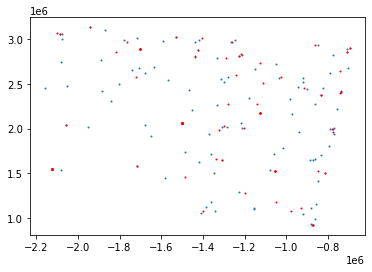

In [44]:
fig, ax = plt.subplots()

ax.scatter(usdm_x_origins, usdm_y_origins, s=1)
ax.scatter(usdm_x_terminations, usdm_y_terminations, s=1, c='r')

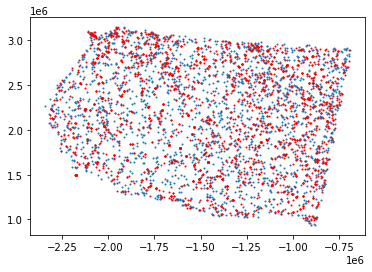

In [45]:
fig, ax = plt.subplots()

ax.scatter(spi30d_x_origins, spi30d_y_origins, s=1)
ax.scatter(spi30d_x_terminations, spi30d_y_terminations, s=1, c='r')

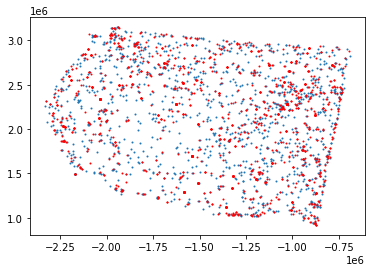

In [46]:
fig, ax = plt.subplots()

ax.scatter(spi180d_x_origins, spi180d_y_origins, s=1)
ax.scatter(spi180d_x_terminations, spi180d_y_terminations, s=1, c='r')

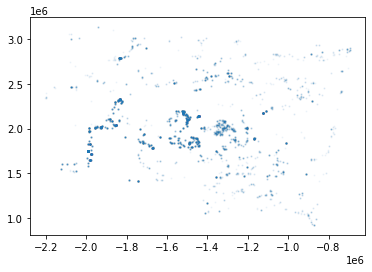

In [47]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(usdm_dtd['x']), np.hstack(usdm_dtd['y']), alpha=0.05, s=1)

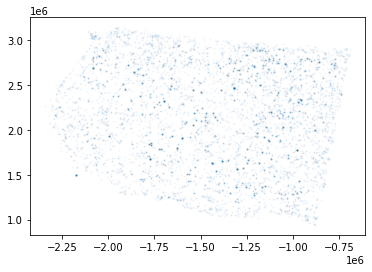

In [48]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi30d_dtd['x']), np.hstack(spi30d_dtd['y']), alpha=0.05, s=1)

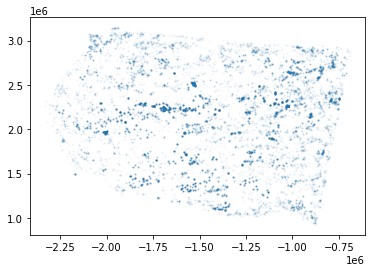

In [49]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi180d_dtd['x']), np.hstack(spi180d_dtd['y']), alpha=0.05, s=1)

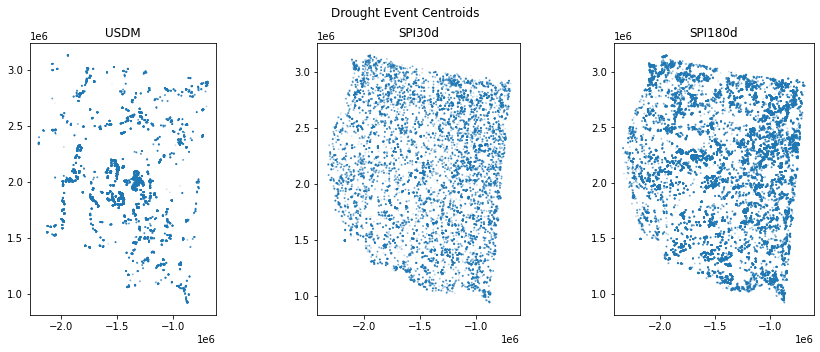

In [50]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(np.hstack(data['x']), np.hstack(data['y']), alpha=np.hstack(data['a']), s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

In [51]:
import geopandas as gpd

In [52]:
df = gpd.read_file('/pool0/home/steinjao/data/drought/drought_impact/data/geometry/tl_2022_us_state.shp')
df.to_crs("EPSG:4326");
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

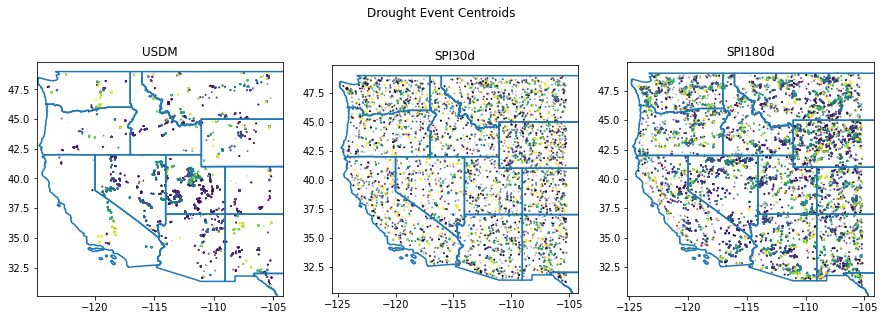

In [53]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):

    colors = []
    for track in data['c']:
        for val in track:
            colors.append(val)
    x = np.hstack(data['x'])
    y = np.hstack(data['y'])


    lat, lon = dnw.transform_points(x, y)
    ax.scatter(lon, lat, alpha=np.hstack(data['a']), s=1, c=colors)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    us49.boundary.plot(ax=ax)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

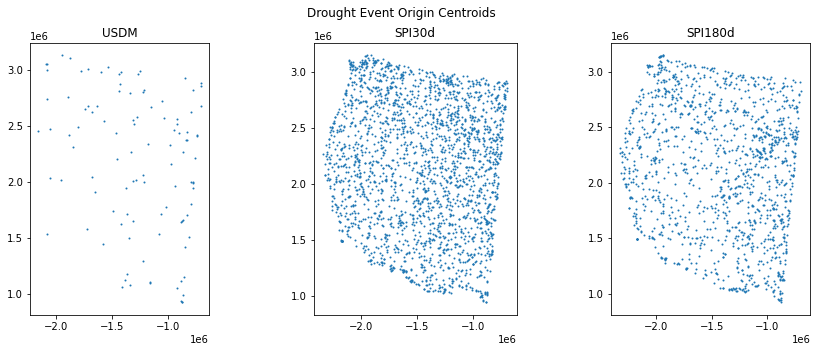

In [54]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_origins, y_origins, title in zip(
    axs.ravel(), 
    [usdm_x_origins, spi30d_x_origins, spi180d_x_origins],
    [usdm_y_origins, spi30d_y_origins, spi180d_y_origins],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_origins, y_origins, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Origin Centroids')
fig.set_facecolor('w')

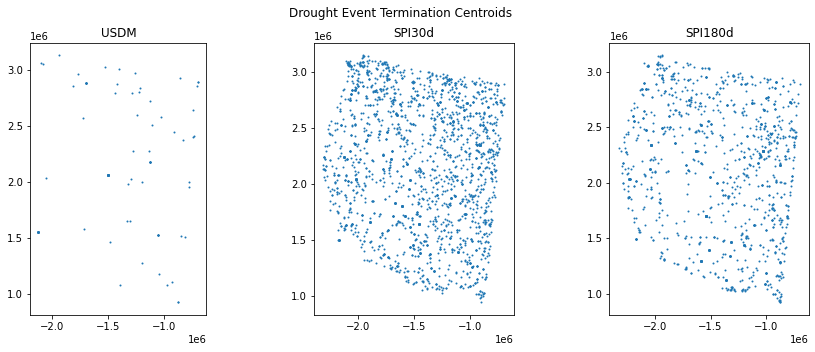

In [55]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_terminations, y_terminations, title in zip(
    axs.ravel(), 
    [usdm_x_terminations, spi30d_x_terminations, spi180d_x_terminations],
    [usdm_y_terminations, spi30d_y_terminations, spi180d_y_terminations],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_terminations, y_terminations, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Termination Centroids')
fig.set_facecolor('w')

## Area Signature

### USDM

In [56]:
intervals = list(set(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(365.0, 730.0, closed='right'),
 Interval(60.0, 90.0, closed='right'),
 Interval(0.0, 30.0, closed='right'),
 nan,
 Interval(90.0, 180.0, closed='right'),
 Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right'),
 Interval(1825.0, 8141.0, closed='right'),
 Interval(730.0, 1825.0, closed='right')]

In [57]:
sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

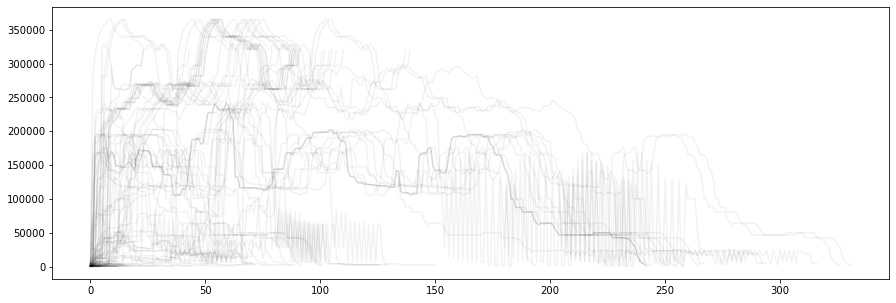

In [58]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in usdm_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

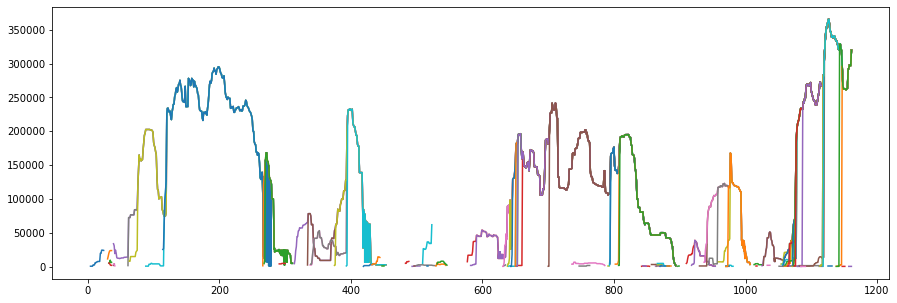

In [59]:
fig, ax = plt.subplots(figsize=(15,5))

for t_track, s_track in zip(usdm_dtd['t'], usdm_dtd['s']):
    ax.plot(t_track, s_track)

In [60]:
usdm_dnet = dnet.DroughtNetwork.unpickle(f"/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net_{exp_tag}.pickle")

<AxesSubplot:xlabel='Time', ylabel='Area in Drought Event'>

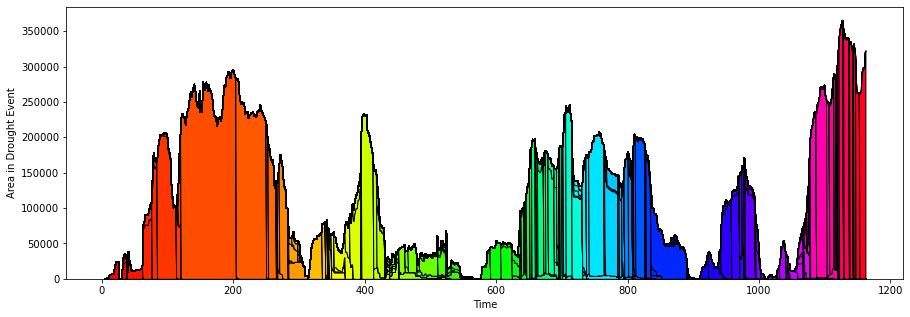

In [63]:
fig, ax = plt.subplots(figsize=(15,5))

usdm_dnet.stacked_events_plot(edgecolor='k', ax=ax)

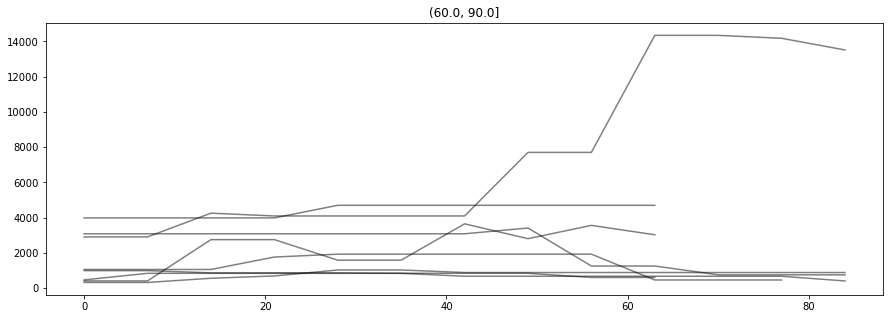

In [59]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

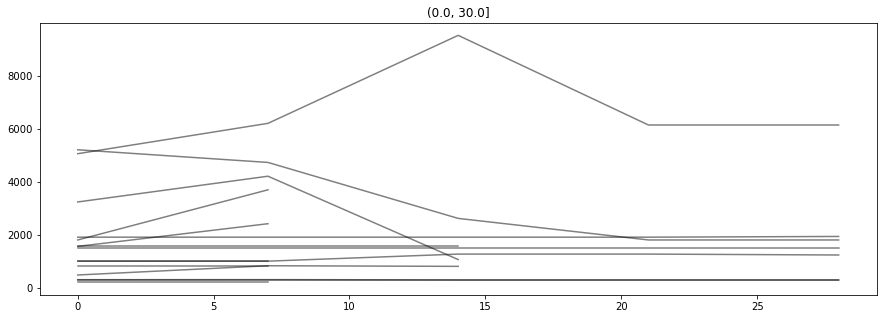

In [60]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

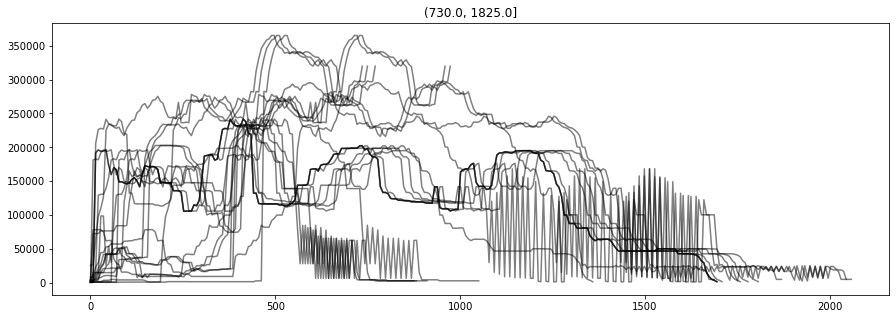

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

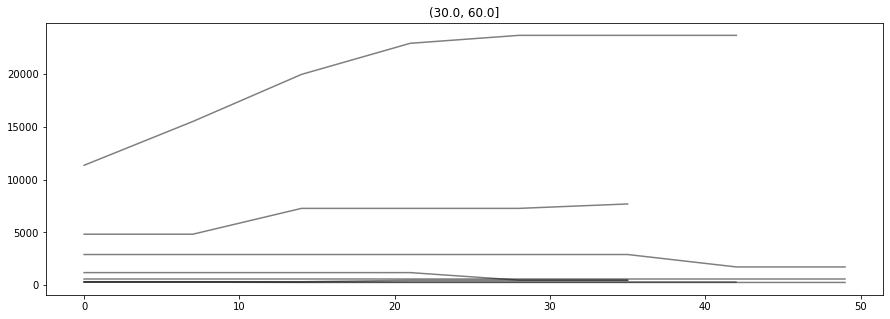

In [62]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

KeyError: nan

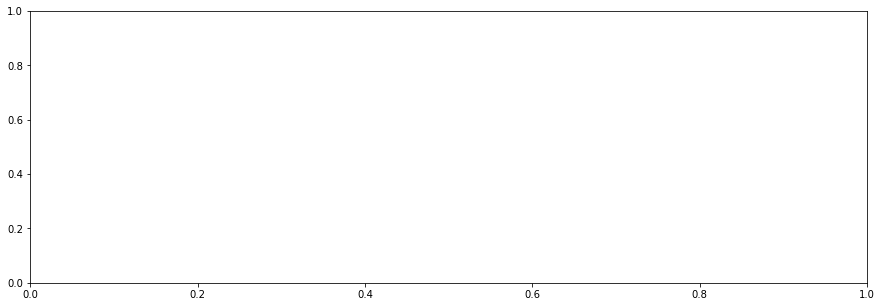

In [63]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

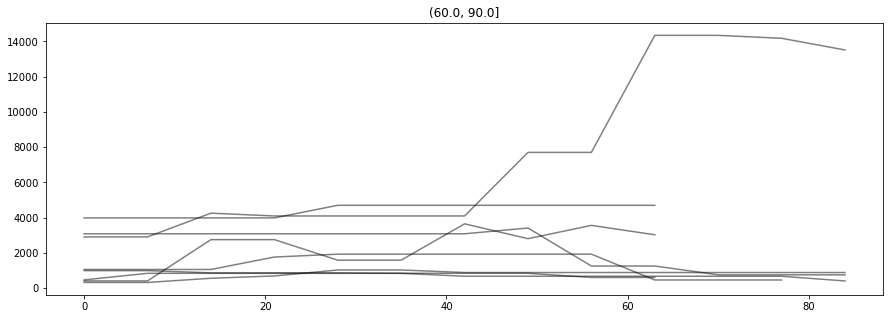

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

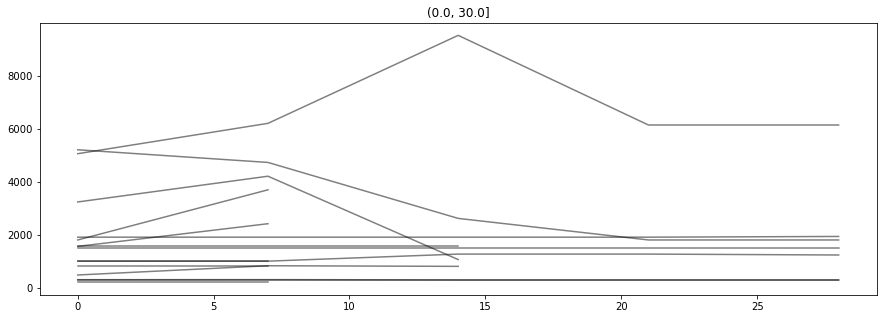

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 6

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

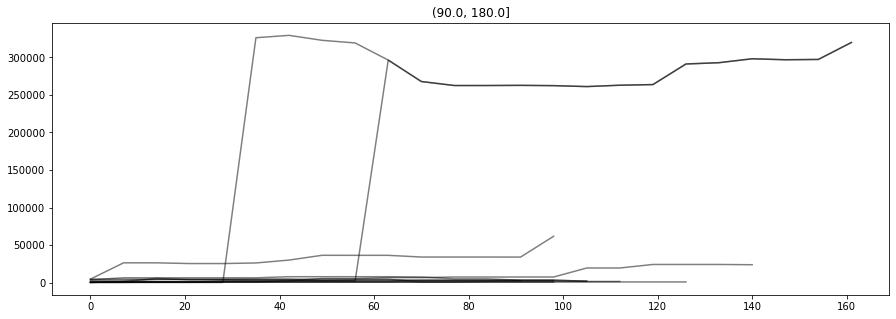

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 7

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

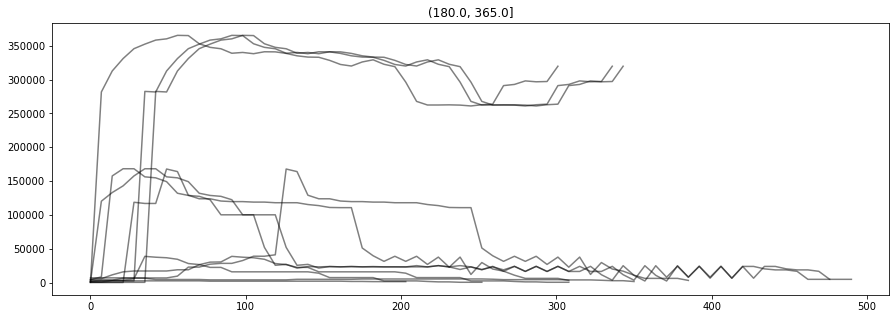

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 8

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

### SPI

In [ ]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(30.0, 60.0, closed='right'),
 nan,
 Interval(60.0, 90.0, closed='right'),
 Interval(0.0, 30.0, closed='right'),
 Interval(90.0, 180.0, closed='right')]

In [ ]:
sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

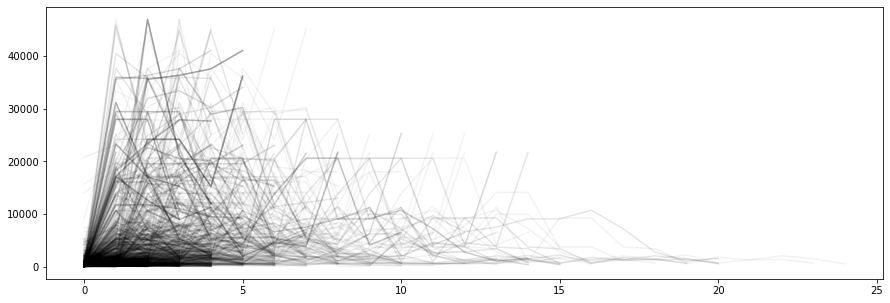

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in spi30d_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

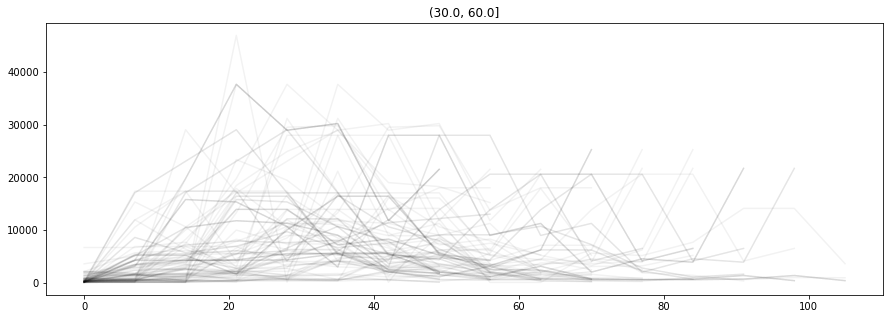

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

KeyError: nan

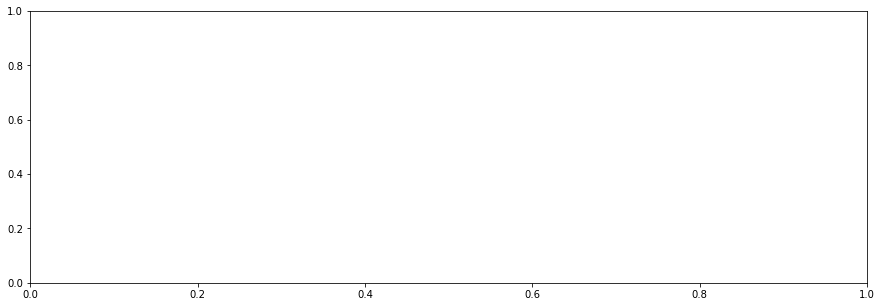

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

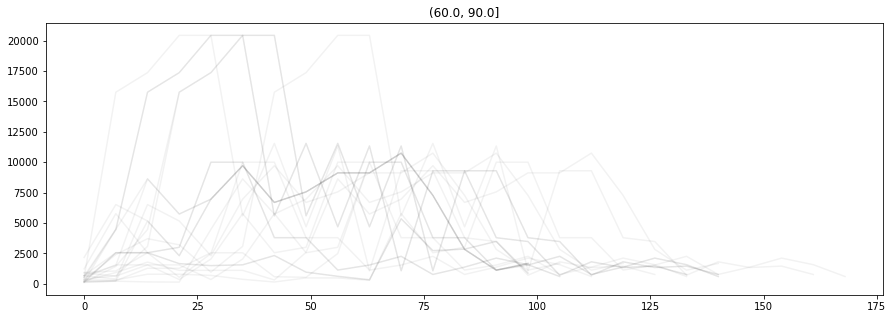

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

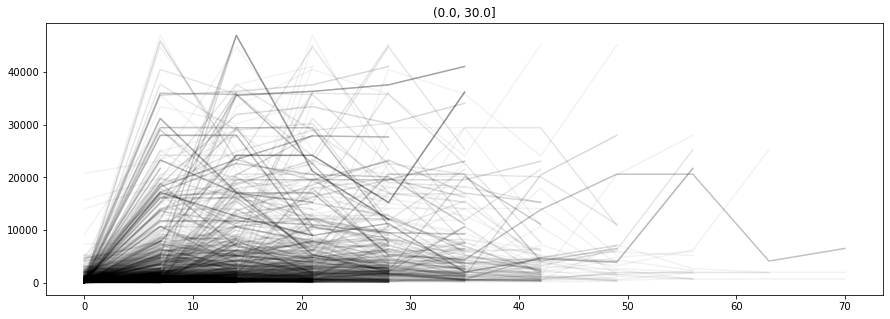

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

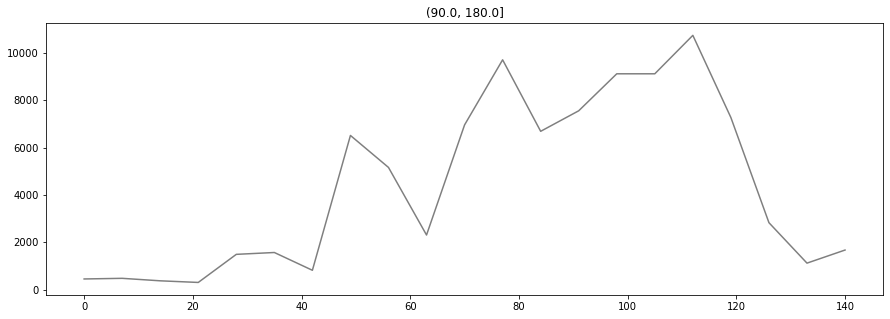

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

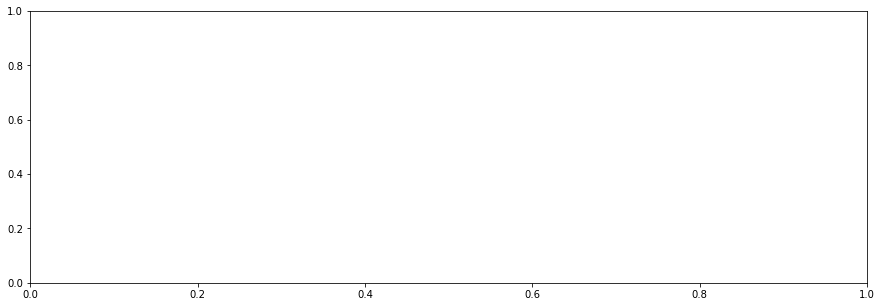

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

### SPI 180D

In [ ]:
intervals = list(set(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(30.0, 60.0, closed='right'),
 Interval(365.0, 730.0, closed='right'),
 nan,
 Interval(60.0, 90.0, closed='right'),
 Interval(0.0, 30.0, closed='right'),
 Interval(90.0, 180.0, closed='right'),
 Interval(180.0, 365.0, closed='right')]

In [ ]:
sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

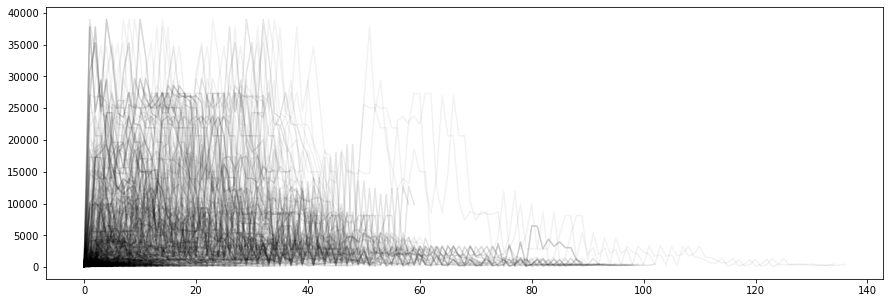

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in spi180d_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

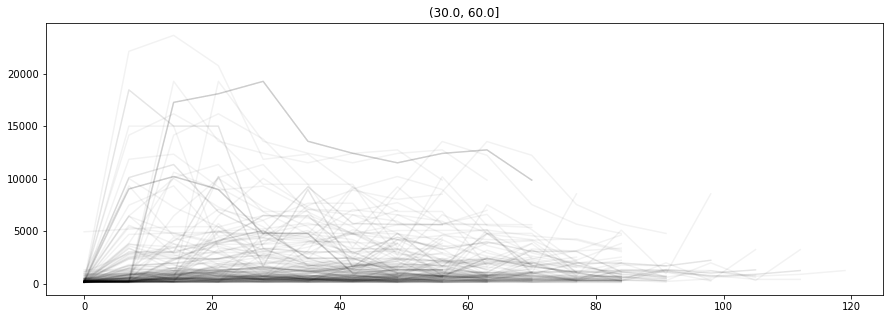

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

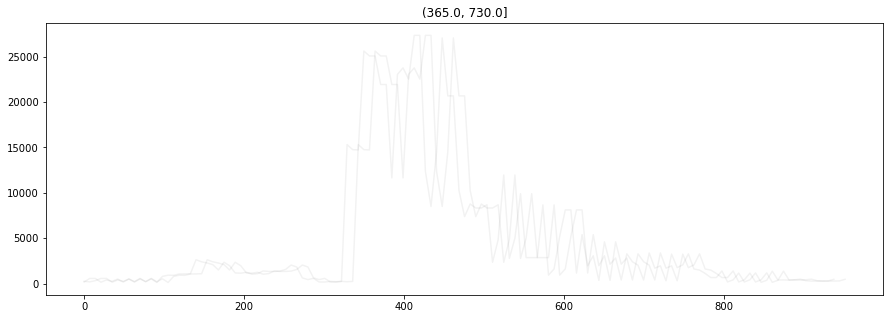

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

KeyError: nan

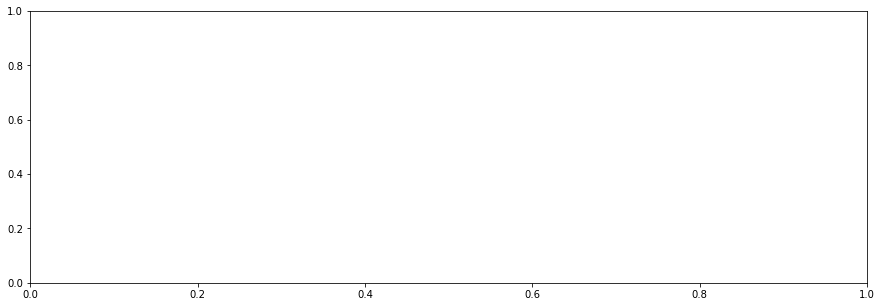

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

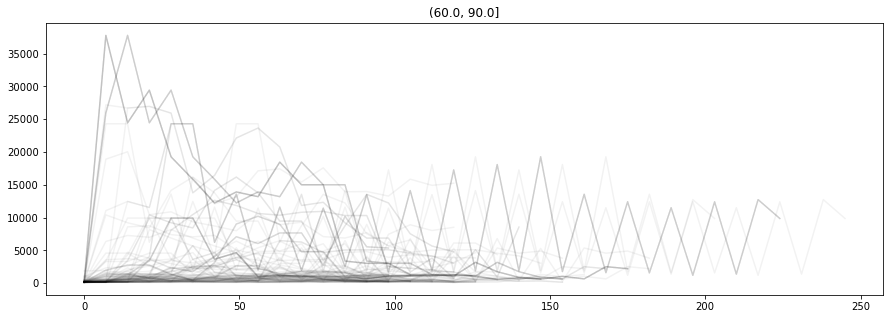

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

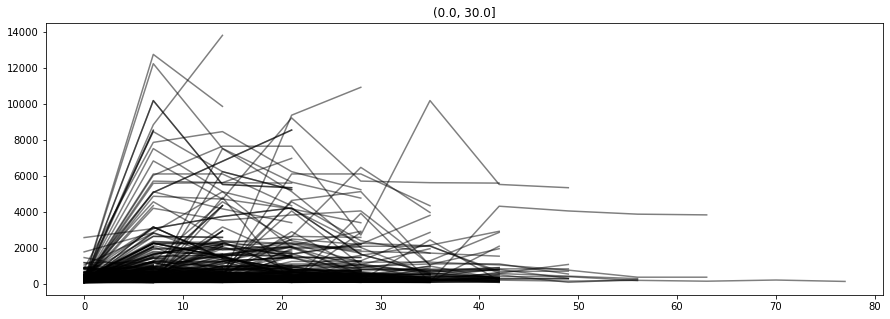

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

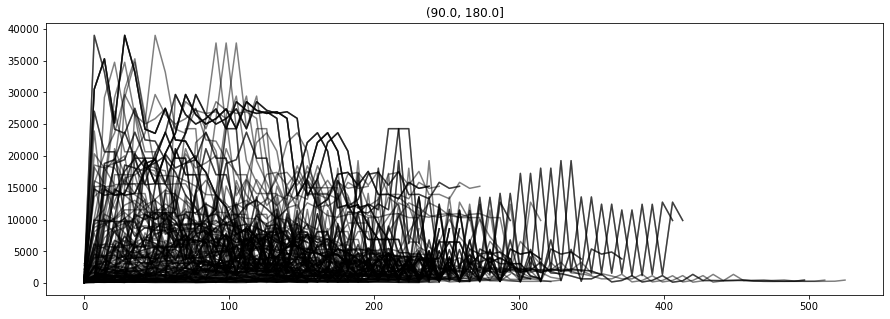

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

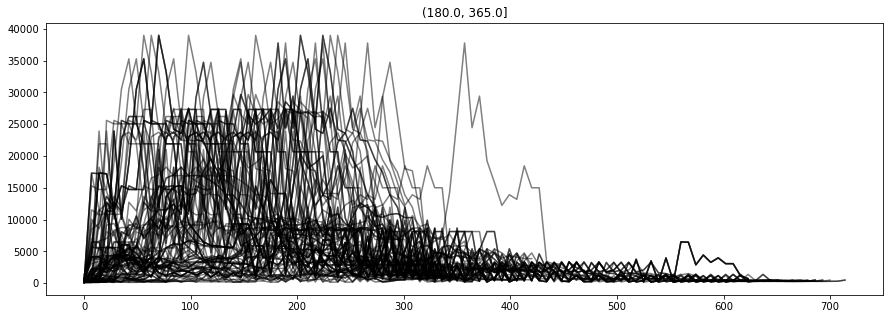

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 6

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

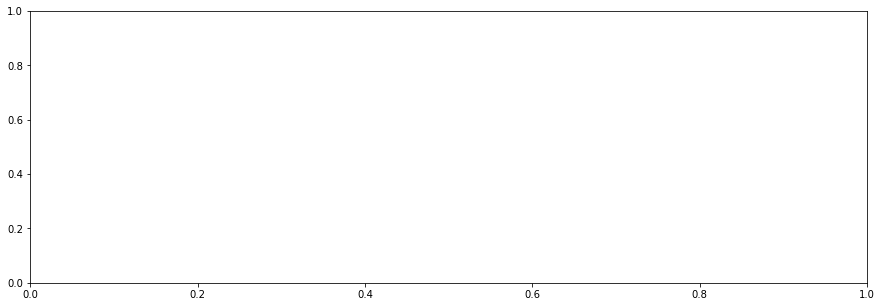

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 7

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);